In [5]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calander
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import warnings

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet('fhvhv_tripdata_2022-01.parquet')
df2 = pd.read_parquet('fhvhv_tripdata_2021-11.parquet')
winter = pd.concat([df, df2]).reset_index(drop=True)
winter = pd.read_parquet('11and1.parquet')
df = pd.read_parquet('fhvhv_tripdata_2021-12.parquet')
winter2 = pd.concat([winter, df]).reset_index(drop=True)
winter2.to_parquet('1112and1.parquet')
winter3 = pd.read_parquet('1112and1.parquet')
df = pd.read_parquet('fhvhv_tripdata_2022-02.parquet')
winter = pd.concat([winter3, df]).reset_index(drop=True)
winter.to_parquet('until2.parquet')
df = pd.read_parquet('until2.parquet')
winter2 = pd.read_parquet('fhvhv_tripdata_2022-03.parquet')
winter = pd.concat([df, winter2]).reset_index(drop=True)
winter.to_parquet('until3.parquet')
df = pd.read_parquet('until3.parquet')
winter2 = pd.read_parquet('fhvhv_tripdata_2022-05.parquet')
winter = pd.concat([df, winter2]).reset_index(drop=True)
winter.to_parquet('until5.parquet')
df = pd.read_parquet('until5.parquet')
winter2 = pd.read_parquet('fhvhv_tripdata_2022-06.parquet')
winter = pd.concat([df, winter2]).reset_index(drop=True)
winter.to_parquet('until6.parquet')
df = pd.read_parquet('until6.parquet')
winter2 = pd.read_parquet('fhvhv_tripdata_2022-07.parquet')
winter = pd.concat([df, winter2]).reset_index(drop=True)
winter.to_parquet('until7.parquet')
df = pd.read_parquet('until7.parquet')
winter2 = pd.read_parquet('fhvhv_tripdata_2022-08.parquet')
winter = pd.concat([df, winter2]).reset_index(drop=True)
winter.to_parquet('until8.parquet')
df = pd.read_parquet('until8.parquet')
winter2 = pd.read_parquet('fhvhv_tripdata_2022-09.parquet')
winter = pd.concat([df, winter2]).reset_index(drop=True)
winter.to_parquet('until8.parquet')
df = pd.read_parquet('until8.parquet')

In [5]:
df = df[(df['request_datetime']>= '2021-11-01 00:00:00') & (df['on_scene_datetime'] >= '2021-11-01 00:00:00') 
   & (df['pickup_datetime'] >= '2021-11-01 00:00:00') & (df['dropoff_datetime'] >= '2021-11-01 00:00:00')]

In [6]:
df = df[(df['request_datetime'] <= '2022-11-01 23:59:59') & (df['on_scene_datetime'] <= '2022-11-01 23:59:59') 
   & (df['pickup_datetime'] <= '2022-11-01 23:59:59') & (df['dropoff_datetime'] <= '2022-11-01 23:59:59')]

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['date'] = df['pickup_datetime'].dt.normalize()
df['time'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['date'].dt.day_name()
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']
df['duration'] = df['duration'] / np.timedelta64(1, 'm')

In [11]:
df.head(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,date,time,weekday,duration
0,HV0003,B03404,B03404,2022-05-01 00:15:31,2022-05-01 00:28:12,2022-05-01 00:33:13,2022-05-01 00:51:49,263,163,1.99,...,22.54,N,N,,N,N,2022-05-01,0,Sunday,18.600000
1,HV0003,B03404,B03404,2022-05-01 00:03:27,2022-05-01 00:08:49,2022-05-01 00:09:11,2022-05-01 00:32:38,140,32,10.95,...,30.12,N,N,,N,N,2022-05-01,0,Sunday,23.450000
2,HV0003,B03404,B03404,2022-04-30 23:55:03,2022-04-30 23:59:04,2022-05-01 00:00:56,2022-05-01 00:18:45,205,197,5.28,...,15.56,N,N,,N,N,2022-05-01,0,Sunday,17.816667
3,HV0003,B03404,B03404,2022-05-01 00:26:43,2022-05-01 00:31:00,2022-05-01 00:31:56,2022-05-01 00:40:12,180,216,1.43,...,7.53,N,N,,N,N,2022-05-01,0,Sunday,8.266667
4,HV0003,B03404,B03404,2022-05-01 00:40:23,2022-05-01 00:43:00,2022-05-01 00:43:23,2022-05-01 00:46:21,197,197,0.41,...,7.14,N,N,,N,N,2022-05-01,0,Sunday,2.966667


In [13]:
cal = calander()
holidays = cal.holidays(start='2018-01-01', end='2018-12-31')
df['holiday'] = df['date'].isin(holidays)
df['week'] = df['date'].dt.dayofweek
df.loc[df['week'] >= 5, 'day_type'] = "weekend"
df.loc[df['week'] < 5, 'day_type'] = "workday"
df.loc[df['holiday'] == True, 'day_type'] = "holiday"
df = df.drop(['holiday', 'week'], axis=1)

In [14]:
# calculate tip percentage using tip amount and total amount
df['tip_percent'] = (df.tips / df.driver_pay) * 100

In [15]:
def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

df['time_desc'] = df['time'].apply(time_slots)

In [15]:
df = df.drop(['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag'], axis=1)

In [16]:
# trip_distance <= 0
df = df[(df['trip_miles'] > 0) & (df['trip_miles'] <= 100)]

# remove trips with tip precentage over 50%
df = df[(df['tip_percent'] >= 0) & (df['tip_percent'] <= 50)]

# PU and DO location id not within NYC taxi zone
df = df[(df['PULocationID'] >= 1) & (df['PULocationID'] <= 263) & (df['DOLocationID'] >= 1) & (df['DOLocationID'] <= 263)]

In [17]:
zone_df = pd.read_csv('taxi+_zone_lookup.csv')
df = pd.DataFrame(pd.merge(df, zone_df[['LocationID', 'Borough']], left_on='PULocationID', right_on='LocationID')).drop('LocationID', axis=1)
df = df.rename({'Borough':'PUborough'}, axis=1)
df = pd.DataFrame(pd.merge(df, zone_df[['LocationID', 'Borough']], left_on='DOLocationID', right_on='LocationID')).drop('LocationID', axis=1)
df = df.rename({'Borough':'DOborough'}, axis=1)

In [5]:
df.to_parquet('cleaned_2021-22.parquet')

In [1]:
import pandas as pd;
df = pd.read_parquet('cleaned_2021-22.parquet')

In [2]:
df.head(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,date,time,weekday,duration,day_type,time_desc,tip_percent,Borough_x,Borough_y,DOborough
0,HV0003,B03404,B03404,2022-01-01 00:05:31,2022-01-01 00:05:40,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,1.18,...,2022-01-01,0,Saturday,11.066667,weekend,Late Night,0.000000,Manhattan,Manhattan,Manhattan
1,HV0003,B03404,B03404,2022-01-01 00:08:35,2022-01-01 00:12:18,2022-01-01 00:13:57,2022-01-01 00:32:21,170,161,0.82,...,2022-01-01,0,Saturday,18.400000,weekend,Late Night,0.000000,Manhattan,Manhattan,Manhattan
2,HV0003,B03404,B03404,2022-01-01 00:42:36,2022-01-01 00:42:52,2022-01-01 00:46:00,2022-01-01 01:00:12,170,161,1.03,...,2022-01-01,0,Saturday,14.200000,weekend,Late Night,0.000000,Manhattan,Manhattan,Manhattan
3,HV0003,B03404,B03404,2022-01-01 00:10:46,2022-01-01 00:14:58,2022-01-01 00:15:30,2022-01-01 00:22:29,170,161,0.89,...,2022-01-01,0,Saturday,6.983333,weekend,Late Night,40.927694,Manhattan,Manhattan,Manhattan
4,HV0003,B03404,B03404,2022-01-01 00:06:40,2022-01-01 00:25:27,2022-01-01 00:25:27,2022-01-01 00:37:30,170,161,1.22,...,2022-01-01,0,Saturday,12.050000,weekend,Late Night,38.461538,Manhattan,Manhattan,Manhattan


In [3]:
weekdaysName = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
throughoutYear = pd.crosstab(df['weekday'], df['time'])
throughoutYear = throughoutYear.reindex(weekdaysName, axis=0)

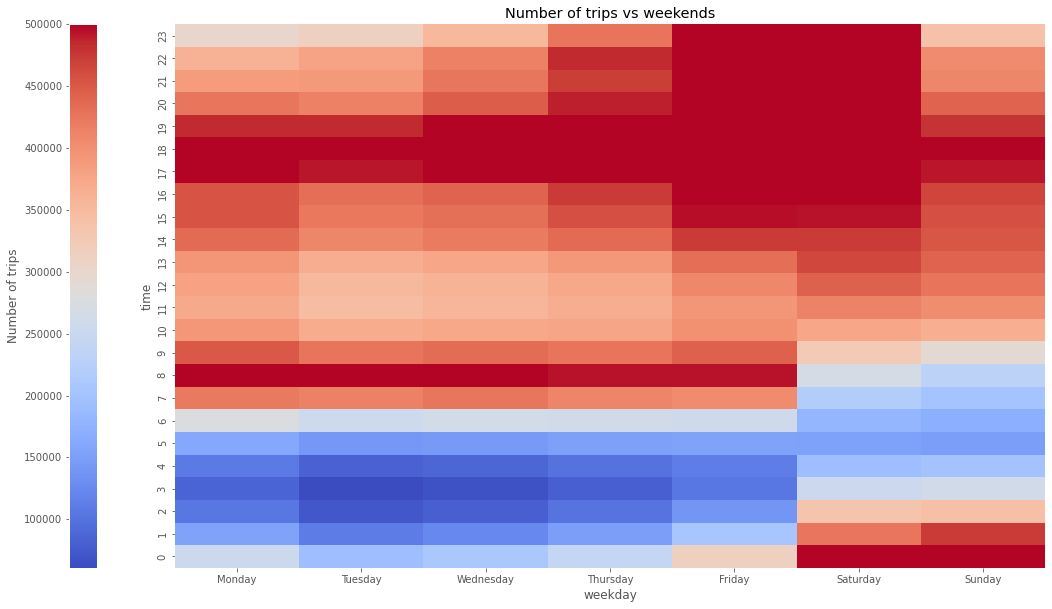

In [6]:
figure, ax = plt.subplots(ncols=1, figsize=(20, 10))
figure.subplots_adjust(wspace=0.005)
day_hour_NumberOfTrips = sns.heatmap(throughoutYear.transpose(), ax=ax, cmap="coolwarm", vmax=500000, cbar=False)
figure.colorbar(ax.collections[0], label='Number of trips', ax=ax,location="left", use_gridspec=False, pad=0.07)
day_hour_NumberOfTrips.invert_yaxis()
ax.set_title('Number of trips vs weekends')
plt.show()

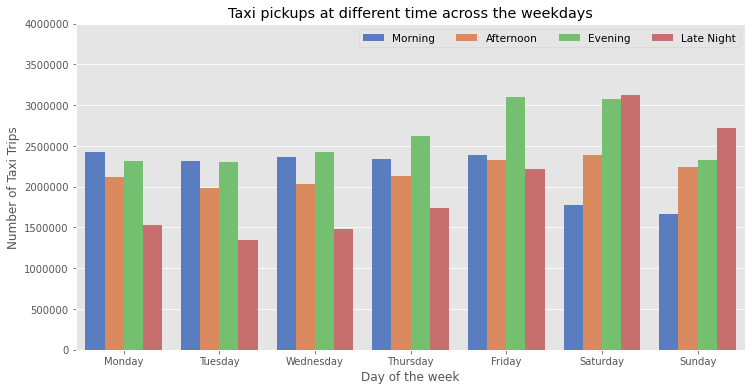

In [9]:
throughoutYear = pd.crosstab(df['weekday'], df['time_desc']).reindex(weekdaysName, axis=0)
stacked_throughoutYear = throughoutYear.stack().reset_index().rename(columns={0:'pick_ups'})
time_order = ['Morning', 'Afternoon', 'Evening', 'Late Night']
stacked_throughoutYear.time_desc = pd.Categorical(stacked_throughoutYear.time_desc, categories=time_order)

figure, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=stacked_throughoutYear.weekday, y=stacked_throughoutYear.pick_ups, hue=stacked_throughoutYear.time_desc, ax=ax, palette = 'muted')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Day of the week')
ax.set_title('Taxi pickups at different time across the weekdays')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 4000000)
plt.legend(loc=1, ncol=len(stacked_throughoutYear.time_desc), prop={'size': 10.5})
plt.show()

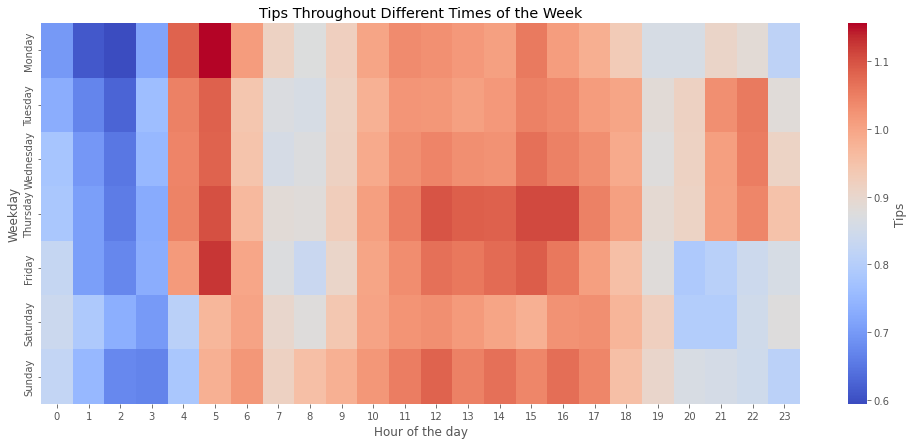

In [10]:
tips = df.groupby(['weekday', 'time'], as_index=False)['tips'].mean()
tips.weekday = pd.Categorical(tips.weekday, categories=weekdaysName)
tips = tips.sort_values(['weekday', 'time']).reset_index(drop=True)
tips_heatmap = pd.pivot_table(tips, values='tips', index='weekday', columns='time')
fig, ax = plt.subplots(figsize=(17, 7))
sns.heatmap(tips_heatmap, cbar_kws={'label': 'Tips'}, ax=ax, cmap='coolwarm')
ax.set_ylabel('Weekday')
ax.set_xlabel('Hour of the day')
ax.set_title('Tips Throughout Different Times of the Week')
plt.show()

In [11]:
sf = gpd.read_file('taxi_zones.shx')
doLocationID_tips = df.groupby(['DOLocationID'], as_index=False)['tips'].mean()
doLocationID_gpd = gpd.GeoDataFrame(pd.merge(doLocationID_tips, sf, left_on='DOLocationID', right_on='LocationID')).drop('DOLocationID',axis=1)
pickUpLocationID_tips = df.groupby(['PULocationID'], as_index=False)['tips'].mean()
pickUpLocationID_gdf = gpd.GeoDataFrame(pd.merge(pickUpLocationID_tips, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)

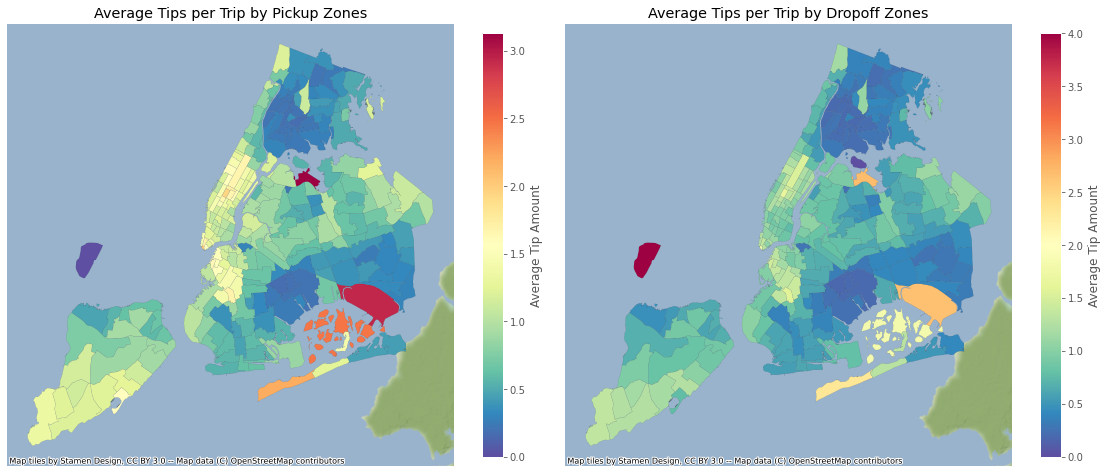

In [12]:
figure, axes = plt.subplots(ncols=2, figsize=(20, 10))
tipsMin, tipsMax = pickUpLocationID_gdf['tips'].min(), pickUpLocationID_gdf['tips'].max()
pickUpLocationID_gdf.plot(column='tips', cmap='Spectral_r', linewidth=0.05, ax=axes[0], edgecolor='k',
    legend=True, legend_kwds={'label': "Average Tip Amount", 'shrink': 0.78}, vmin=tipsMin, vmax=tipsMax, 
    missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"})

tipsMin, tipsMax = doLocationID_gpd['tips'].min(), doLocationID_gpd['tips'].max()
doLocationID_gpd.plot(column='tips', cmap='Spectral_r', linewidth=0.05, ax=axes[1], edgecolor='k',
    legend=True, legend_kwds={'label': "Average Tip Amount", 'shrink': 0.78}, vmin=tipsMin, vmax=tipsMax,
    missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"})

figure.subplots_adjust(wspace=0)
ctx.add_basemap(axes[0])
ctx.add_basemap(axes[1])
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[0].set_title("Average Tips per Trip by Pickup Zones")
axes[1].set_title("Average Tips per Trip by Dropoff Zones")
plt.show()

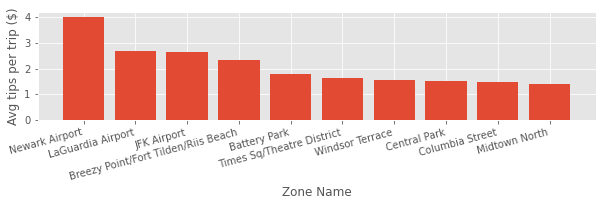

In [13]:
top_10_TippingLocations = pd.merge(doLocationID_gpd, df['DOLocationID'].value_counts().sort_index(), left_on='LocationID', right_on=df['DOLocationID'].value_counts().sort_index().index)
top_10_TippingLocations = top_10_TippingLocations.rename({'count': 'Pickup_freq'}, axis=1)
top_10_TippingLocations = top_10_TippingLocations[top_10_TippingLocations['Pickup_freq'] > 100]
top_10_TippingLocations = top_10_TippingLocations.sort_values('tips', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(top_10_TippingLocations['zone'], top_10_TippingLocations['tips'])
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tips per trip ($)')
plt.xticks(rotation=15,horizontalalignment="right")
plt.show()